<a href="https://www.kaggle.com/code/nseconds/sleep-data-analysis?scriptVersionId=215301108" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/health-and-sleep-statistics/Health_Sleep_Statistics.csv")
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [3]:
df.size

1200

In [4]:
df.columns.size

12

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [6]:
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [7]:
df.isna().sum()

User ID                    0
Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(['User ID'],axis=1,inplace=True)

In [10]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


**Age vs Sleep Quality Analysis**

In [11]:
age_sleep_quality_corr = df[['Age','Sleep Quality']].corr()
age_sleep_quality_corr

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


In [12]:
age_sleep_quality_corr['Age']

Age              1.000000
Sleep Quality   -0.848356
Name: Age, dtype: float64

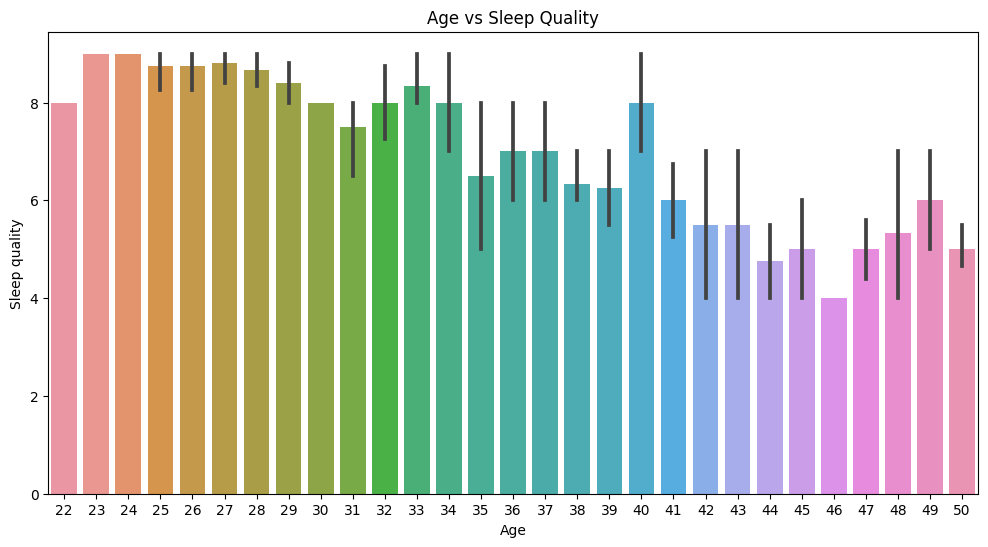

In [13]:
plt.figure(figsize= (12,6))
sns.barplot(x='Age',y ='Sleep Quality',data=df)
plt.title("Age vs Sleep Quality")
plt.xlabel("Age")
plt.ylabel("Sleep quality")
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
age_sleep_quality_model = LinearRegression()

x=df[['Age']]
y=df['Sleep Quality']

age_sleep_quality_model.fit(x,y)

LinearRegression()

In [15]:
age_sleep_quality_model.intercept_

13.268812023190648

In [16]:
age_sleep_quality_model.coef_

array([-0.17408531])

In [17]:
age_sleep_quality_prediction = age_sleep_quality_model.predict(x)

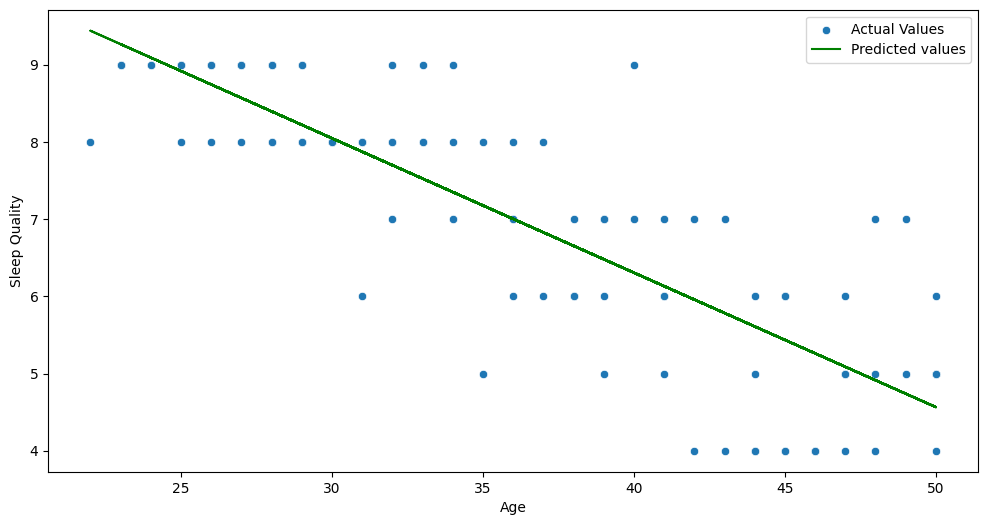

In [18]:
plt.figure(figsize =(12,6))
sns.scatterplot(x='Age',y='Sleep Quality',label="Actual Values",data=df)
plt.plot(x,age_sleep_quality_prediction,color ='green',label="Predicted values")
plt.legend()
plt.show()

**Physical Acitvity vs Sleep Quality**

In [19]:
df['Physical Activity Level'].head()

0    medium
1       low
2      high
3       low
4      high
Name: Physical Activity Level, dtype: object

In [20]:
df['Sleep Quality'].head()

0    8
1    7
2    9
3    5
4    8
Name: Sleep Quality, dtype: int64

In [21]:
df['Gender'].head()

0    f
1    m
2    f
3    m
4    f
Name: Gender, dtype: object

<Axes: xlabel='Gender', ylabel='Sleep Quality'>

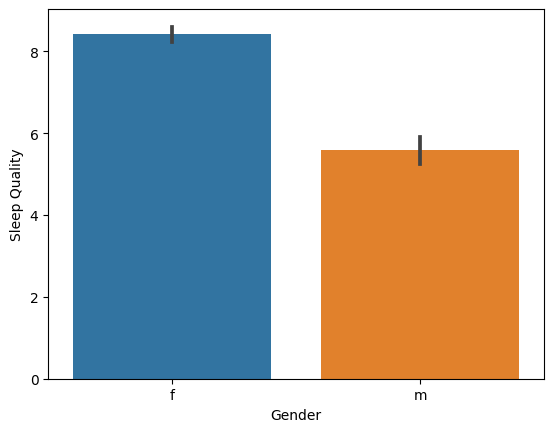

In [22]:
sns.barplot(x='Gender',y='Sleep Quality',data=df)

<Axes: xlabel='Physical Activity Level', ylabel='Sleep Quality'>

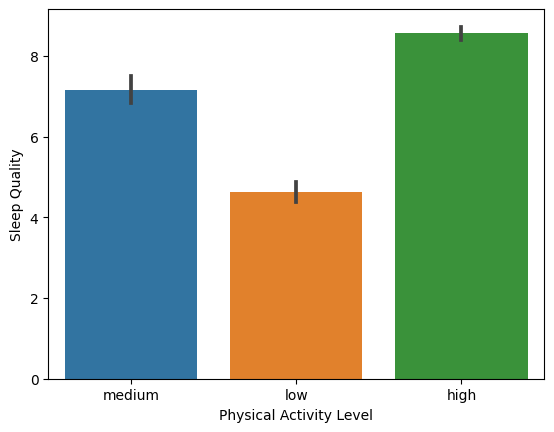

In [23]:
sns.barplot(x= 'Physical Activity Level',y= 'Sleep Quality', data=df)

In [24]:
custom_codes= {'low':1, 'medium':2,'high':3}

In [25]:
df['Physical Activity Level']=df['Physical Activity Level'].map(custom_codes)
df['Physical Activity Level'].head()

0    2
1    1
2    3
3    1
4    3
Name: Physical Activity Level, dtype: int64

<Axes: xlabel='Gender', ylabel='Physical Activity Level'>

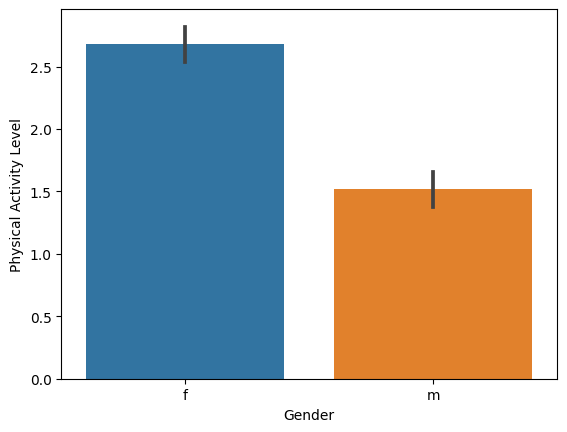

In [26]:
sns.barplot(y='Physical Activity Level', x='Gender', data=df)

In [27]:
from scipy import stats
sleep_quality_males=df[df['Gender']=='m']['Sleep Quality']
sleep_quality_females=df[df['Gender']=='f']['Sleep Quality']

Physical_Activity_males=df[df['Gender']=='m']['Physical Activity Level']
Physical_Activity_females=df[df['Gender']=='f']['Physical Activity Level']

**Lets find out t and p values for Sleep Quality vs Gender & Physical Activity vs Gender**

In [28]:
t_sleep_quality,p_sleep_quality =stats.ttest_ind(sleep_quality_males,sleep_quality_females)
print(f"t_stats value for sleep quality vs Gender : {t_sleep_quality: 2f}")
print(f"p_stats value for sleep quality vs Gender : {p_sleep_quality: 2f}")

t_stats value for sleep quality vs Gender : -14.320329
p_stats value for sleep quality vs Gender :  0.000000


In [29]:
t_Physical_Activity,p_Physical_Activity =stats.ttest_ind(Physical_Activity_males,Physical_Activity_females)
print(f"t_stats value for Physical_Activity vs Gender : {t_Physical_Activity: 2f}")
print(f"p_stats value for Physical_Activity vs Gender : {p_Physical_Activity: 2f}")

t_stats value for Physical_Activity vs Gender : -10.976983
p_stats value for Physical_Activity vs Gender :  0.000000


**Time of Sleep & Walking up vs Sleep Quality**

In [30]:
df['Bedtime'].head()

0    23:00
1    00:30
2    22:45
3    01:00
4    23:30
Name: Bedtime, dtype: object

In [31]:
df['Wake-up Time'].head()

0    06:30
1    07:00
2    06:45
3    06:30
4    07:00
Name: Wake-up Time, dtype: object

In [32]:
def sleep_time_helper_function(str_time):
    h = str_time.split(":")[0]
    m = str_time.split(":")[1]

    return int(h) + int(m)/60

df['Bedtime']=df['Bedtime'].apply(sleep_time_helper_function)
df['Wake-up Time']=df['Wake-up Time'].apply(sleep_time_helper_function)

In [33]:
df['Bedtime'].head()

0    23.00
1     0.50
2    22.75
3     1.00
4    23.50
Name: Bedtime, dtype: float64

In [34]:
df['Sleep Duration Hours']=(df['Wake-up Time']-df['Bedtime'])%24
df['Sleep Duration Hours'].head()

0    7.5
1    6.5
2    8.0
3    5.5
4    7.5
Name: Sleep Duration Hours, dtype: float64

In [35]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


<Axes: xlabel='Bedtime', ylabel='Sleep Quality'>

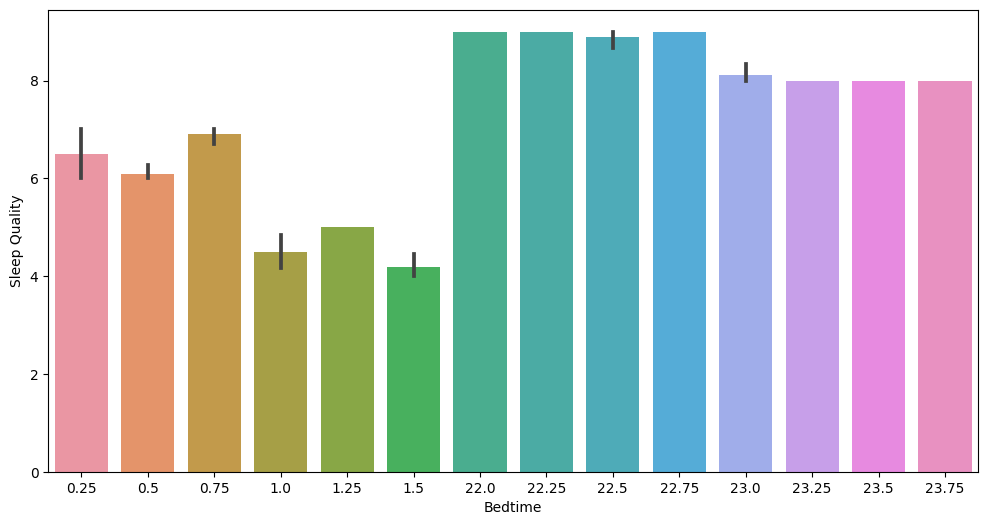

In [36]:
plt.figure(figsize =(12,6))
sns.barplot(x='Bedtime',y='Sleep Quality',data=df)

<Axes: xlabel='Wake-up Time', ylabel='Sleep Quality'>

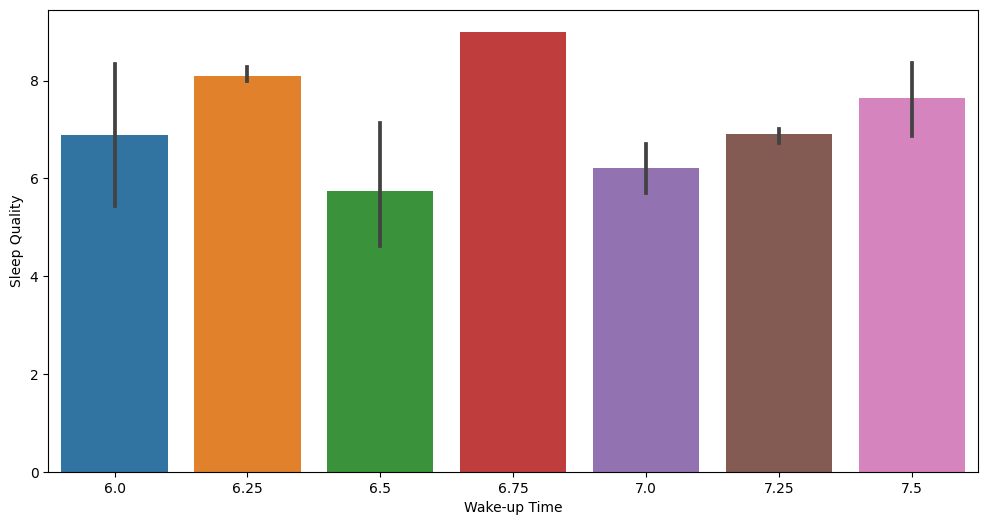

In [37]:
plt.figure(figsize =(12,6))
sns.barplot(x='Wake-up Time',y='Sleep Quality',data=df)

<Axes: xlabel='Sleep Duration Hours', ylabel='Sleep Quality'>

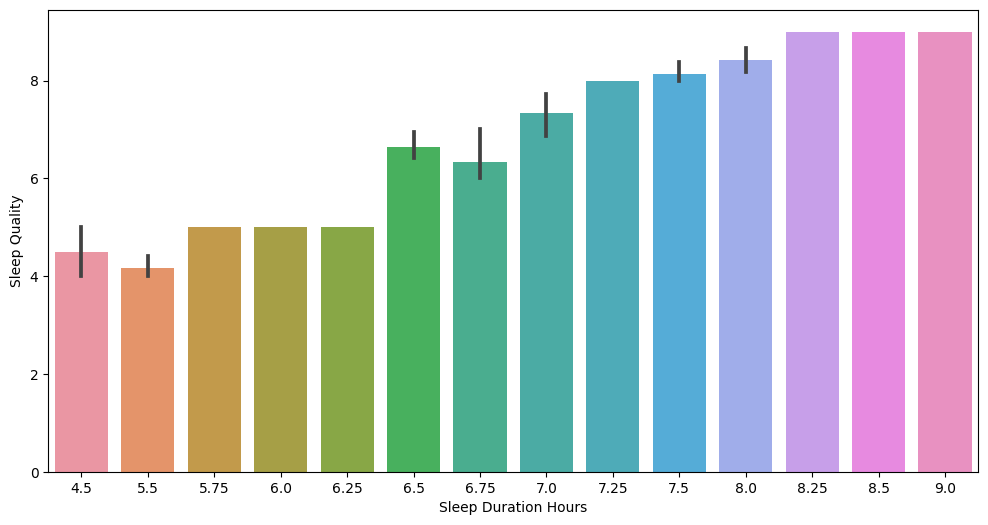

In [38]:
plt.figure(figsize =(12,6))
sns.barplot(x='Sleep Duration Hours',y='Sleep Quality',data=df)

In [39]:
sleep_duration_quality_model = LinearRegression()

x=df[['Sleep Duration Hours']]
y=df['Sleep Quality']

sleep_duration_quality_model.fit(x,y)

LinearRegression()

In [40]:
sleep_duration_quality_model.coef_

array([1.36940999])

In [41]:
sleep_duration_quality_model.intercept_

-2.575599349763152

In [42]:
predictions =sleep_duration_quality_model.predict(x)

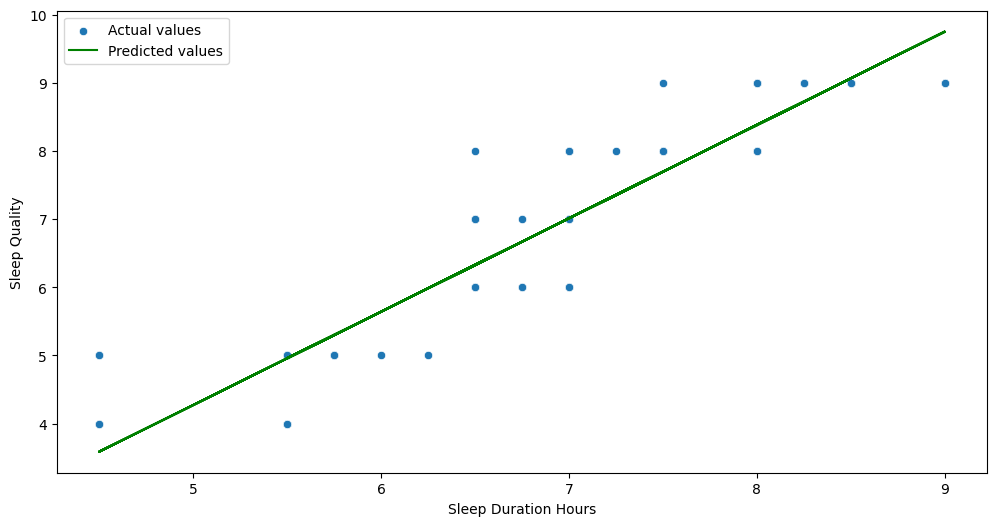

In [43]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Sleep Duration Hours',y='Sleep Quality',data=df,label ='Actual values')
plt.plot(x,predictions,color='green',label='Predicted values')
plt.legend()
plt.show()

In [44]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


**Sleep disorder vs Sleep Quality**

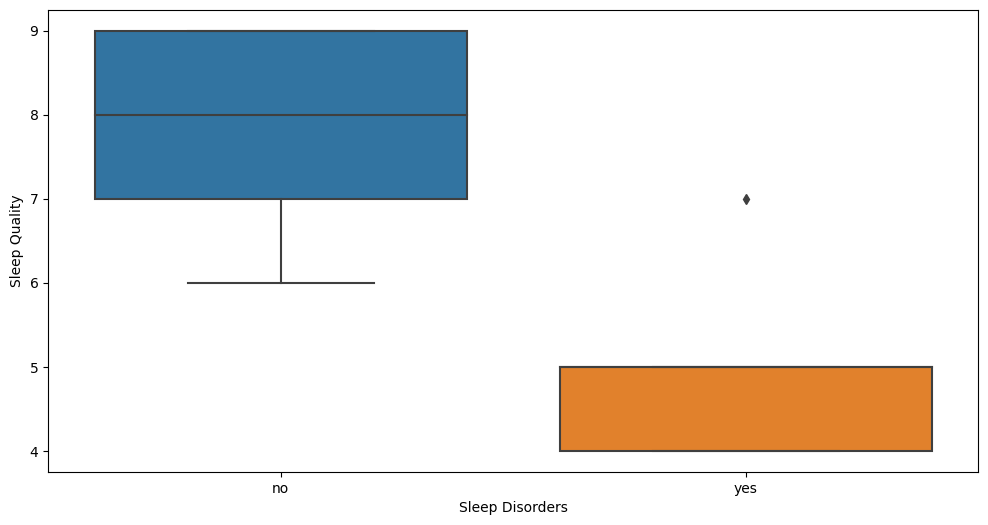

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Sleep Disorders',y='Sleep Quality',data=df)
plt.show()

In [46]:
df_numeric_features = df.select_dtypes(include=['int64','float64'])
df_numeric_features.head()

,Age,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Sleep Duration Hours
0,25,8,23.00,6.50,8000,2500,2,7.5
1,34,7,0.50,7.00,5000,2200,1,6.5
2,29,9,22.75,6.75,9000,2700,3,8.0
3,41,5,1.00,6.50,4000,2100,1,5.5
4,22,8,23.50,7.00,10000,2800,3,7.5


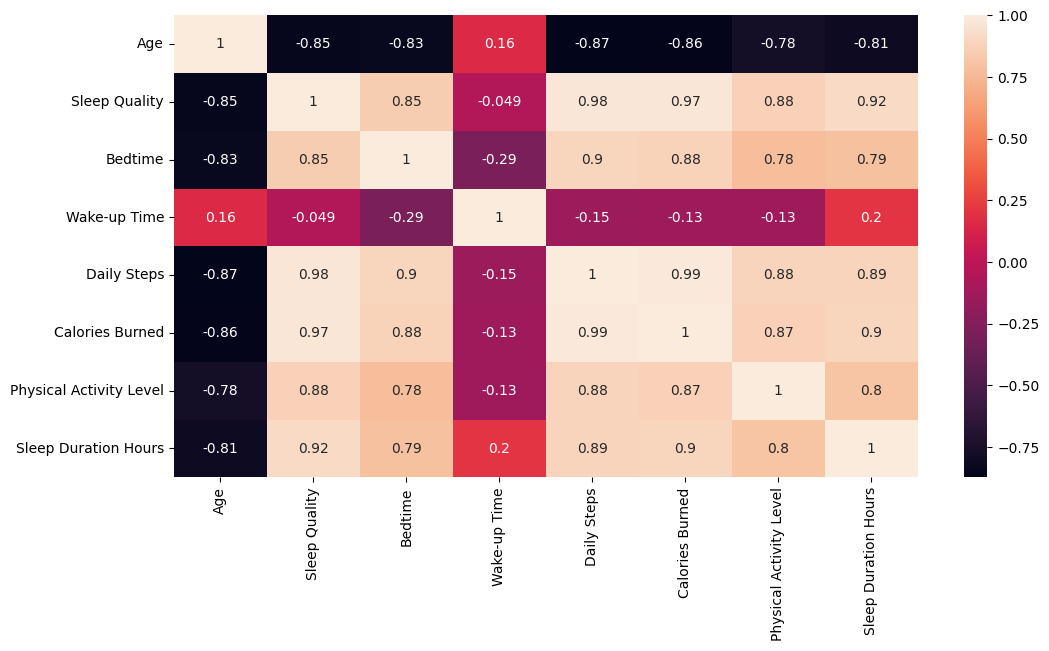

In [47]:
plt.figure(figsize=(12,6))
sns.heatmap(df_numeric_features.corr(),annot=True)
plt.show()